# 1. importing_data.py


In [1]:
import xlrd
import agate
# import the necessary tools

# We are to import our unicef xls data
workbook = xlrd.open_workbook('./Child-labour-database_Nov-2017.xls') # Alexander Lue added this to import new xls
# type(workbook) # type: xlrd.book.Book
workbook.nsheets # this will let us print the number of sheets in our xls
workbook.sheet_names() # and this will print the names of all the sheets

['Child labour  ']

In [2]:
# There is only one sheet in our xls, so we will extract that as our sheet

sheet = workbook.sheets()[0]
# type(sheet) # type xlrd.sheet.Sheet
sheet.nrows # the number of rows in our sheet
sheet.row_values(0) # prints the row values at row 0

# This for loop prints the row and the corresponding row #, r
for r in range(sheet.nrows):
    print(r, sheet.row(r))

0 [empty:'', text:'GLOBAL DATABASES', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
1 [empty:'', text:'[data.unicef.org]', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
2 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
3 [text:'Child labour', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
4 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', emp

In [3]:
# we will zip the column titles to eachother. this will create a tupled list that contains row4 and row5
title_rows = zip(sheet.row_values(8), sheet.row_values(9)) # Alexander Lue added this new code to add correct titles
list(title_rows)
# title_rows is a zip type. An iterable type in Python

[('', ''),
 ('Total ', ''),
 ('', ''),
 ('Sex ', 'Male'),
 ('', ''),
 ('', 'Female'),
 ('', ''),
 ('Place of residence ', 'Urban'),
 ('', ''),
 ('', 'Rural'),
 ('', ''),
 ('Wealth quintile ', 'Poorest'),
 ('', ''),
 ('', 'Second'),
 ('', ''),
 ('', 'Middle'),
 ('', ''),
 ('', 'Fourth'),
 ('', ''),
 ('', 'Richest'),
 ('', ''),
 ('Source', '')]

In [5]:
# We will now use a list comprehensions to create a list with the zip
# concatenated
title_rows = zip(sheet.row_values(8), sheet.row_values(9)) # Alexander Lue added this new code to add correct titles
titles = [i[0]+" "+i[1] for i in title_rows]
titles
titles = [t.strip() for t in titles] # we are going to strip 
# all extra spacing
titles

['',
 'Total',
 '',
 'Sex  Male',
 '',
 'Female',
 '',
 'Place of residence  Urban',
 '',
 'Rural',
 '',
 'Wealth quintile  Poorest',
 '',
 'Second',
 '',
 'Middle',
 '',
 'Fourth',
 '',
 'Richest',
 '',
 'Source']

In [6]:
# This next portion will then a list of lists that contain each
# countries statistics for every category
country_rows = [sheet.row_values(r) for r in range(10, 207)] # Alexander Lue added this new code to add new countries
country_rows

[['Afghanistan',
  29.4,
  '',
  34.1,
  '',
  24.2,
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  'Living Conditions Survey 2013-2014'],
 ['Albania',
  5.1,
  'y',
  6.2,
  'y',
  3.9,
  'y',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  'National Child Labour Survey 2010'],
 ['Algeria',
  5.0,
  'y',
  5.5,
  'y',
  4.5,
  'y',
  4.5,
  'y',
  5.9,
  'y',
  5.2,
  'y',
  5.5,
  'y',
  5.7,
  'y',
  5.2,
  'y',
  3.3,
  'y',
  'MICS 2012-2013 reanalyzed'],
 ['Andorra',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  ''],
 ['Angola',
  23.4,
  '',
  21.6,
  '',
  25.3,
  '',
  18.5,
  '',
  32.3,
  '',
  35.3,
  '',
  28.1,
  '',
  20.6,
  '',
  17.8,
  '',
  15.3,
  '',
  'DHS 2015-2016'],
 ['Antigua and Barbuda',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',
  '-',
  '',


In [7]:
from xlrd.sheet import ctype_text
import agate

# These are agate types
text_type = agate.Text()
number_type = agate.Number()
boolean_type = agate.Boolean()
date_type = agate.Date()

In [25]:
example_row = sheet.row(12) # Alexander Lue changed to use a new ex row
print(example_row) # this is the first country on our list: Afghanistan
print(example_row[0].ctype) # This will print the type of cell 0
print(example_row[0].value) # This prints the value of cell 0
print(ctype_text) # This corresponds to the dict of each ctype to a datatype

[text:'Algeria', number:5.0, text:'y', number:5.5, text:'y', number:4.5, text:'y', number:4.5, text:'y', number:5.9, text:'y', number:5.2, text:'y', number:5.5, text:'y', number:5.7, text:'y', number:5.2, text:'y', number:3.3, text:'y', text:'MICS 2012-2013 reanalyzed']
1
Algeria
{0: 'empty', 1: 'text', 2: 'number', 3: 'xldate', 4: 'bool', 5: 'error', 6: 'blank'}


In [26]:
# we will now capture the types of all the columns in the example row to use
types = []

for v in example_row:
    # use the ctype_text dictionary to grab the datatype
    value_type = ctype_text[v.ctype]
    if value_type == 'text':
        types.append(text_type)
    elif value_type == 'number':
        types.append(number_type)
    elif value_type == 'xldate':
        types.append(date_type)
    else:
        types.append(text_type)
    # we will use these value_types to match with our agate types

types

In [27]:
# Alexander Lue adding title name
titles[0] = 'Countries and areas'
# we can now form this into a table, but we encounter a CastError
table = agate.Table(country_rows, titles, types)

# This is due to an parsing error using a "-" so we must eliminate
# the bad char

/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 4 has no name. Using "e".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 6 has no name. Using "g".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 8 has no name. Using "i".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 10 has no name. Using "k".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 12 has no name. Using "m".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 14 has no name. Using "o".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column

CastError: Can not parse value "" as Decimal. Error at row 0 column Place of residence  Urban.

In [28]:
# This function will remove the hyphen from our table
def remove_bad_chars(val):
    if val == '-':
        return 0
    return val

# we will use a new row to represent the modified values
cleaned_rows = []
for row in country_rows:
    cleaned_row = [remove_bad_chars(rv) for rv in row]
    cleaned_rows.append(cleaned_row)
    # removes the bad characters in each row to cleaned_row, 
    # and then appends to cleaned_rows

table = agate.Table(cleaned_rows, titles, types)


/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 4 has no name. Using "e".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 6 has no name. Using "g".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 8 has no name. Using "i".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 10 has no name. Using "k".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 12 has no name. Using "m".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 14 has no name. Using "o".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column

In [29]:
# We will now generalize this function so that we can call a 
# modification function onto an array and return a new one
def get_new_array(old_array, function_to_clean):
    new_arr = []
    for row in old_array:
        cleaned_row = [function_to_clean(rv) for rv in row]
        new_arr.append(cleaned_row)
        # the function will be passed and called on every
        # row value in row and then appended to the new arr
    return new_arr

cleaned_rows = get_new_array(country_rows, remove_bad_chars)
table = agate.Table(cleaned_rows, titles, types)

/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 4 has no name. Using "e".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 6 has no name. Using "g".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 8 has no name. Using "i".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 10 has no name. Using "k".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 12 has no name. Using "m".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 14 has no name. Using "o".
/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column

In [30]:
table.print_table(max_columns=7)
# This prints the first 7 columns of our table and uses prints the beginning of our table


| Countries and areas | Total | c   | Sex  Male | e   | Female | g   | ... |
| ------------------- | ----- | --- | --------- | --- | ------ | --- | --- |
| Afghanistan         |  29.4 |     |      34.1 |     |   24.2 |     | ... |
| Albania             |   5.1 | y   |       6.2 | y   |    3.9 | y   | ... |
| Algeria             |   5.0 | y   |       5.5 | y   |    4.5 | y   | ... |
| Andorra             |   0.0 |     |       0.0 |     |    0.0 |     | ... |
| Angola              |  23.4 |     |      21.6 |     |   25.3 |     | ... |
| Antigua and Barbuda |   0.0 |     |       0.0 |     |    0.0 |     | ... |
| Argentina           |   4.4 | y   |       4.8 | y   |    3.9 | y   | ... |
| Armenia             |   8.7 | y   |      11.4 | y   |    5.7 | y   | ... |
| Australia           |   0.0 |     |       0.0 |     |    0.0 |     | ... |
| Austria             |   0.0 |     |       0.0 |     |    0.0 |     | ... |
| Azerbaijan          |   6.5 | x,y |       7.5 | x,y |    5.4 | x,y | ... |

# 2. exploring_data.py


In [31]:
# This will print our column names for our table
table.column_names

('Countries and areas',
 'Total',
 'c',
 'Sex  Male',
 'e',
 'Female',
 'g',
 'Place of residence  Urban',
 'i',
 'Rural',
 'k',
 'Wealth quintile  Poorest',
 'm',
 'Second',
 'o',
 'Middle',
 'q',
 'Fourth',
 's',
 'Richest',
 'u',
 'Source')

In [32]:
# We will order the table by highest % of top 10 child labour ctrys
most_egregious = table.order_by('Total', reverse=True).limit(10) #Alexander Lue Changed to match title name
# order by uses the column name to sort, and reverse=True
# does a High - Low ordering
for r in most_egregious.rows:
    print(r)
# This for loop prints the rows of most egregious countries

<agate.Row: ('Mali', Decimal('55.8'), None, Decimal('59.4'), None, ...)>
<agate.Row: ('Benin', Decimal('52.5'), None, Decimal('54.3'), None, ...)>
<agate.Row: ('Chad', Decimal('51.5'), None, Decimal('50.8'), None, ...)>
<agate.Row: ('Guinea-Bissau', Decimal('51.1'), None, Decimal('49.8'), None, ...)>
<agate.Row: ('Somalia', Decimal('49.0'), 'x,y', Decimal('44.5'), 'x,y', ...)>
<agate.Row: ('Solomon Islands', Decimal('47.8'), 'y', Decimal('46.6'), 'y', ...)>
<agate.Row: ('Cameroon', Decimal('47.0'), None, Decimal('49.8'), None, ...)>
<agate.Row: ('Zambia', Decimal('40.6'), 'x,y', Decimal('41.6'), 'x,y', ...)>
<agate.Row: ('Malawi', Decimal('39.3'), None, Decimal('41.7'), None, ...)>
<agate.Row: ('Burkina Faso', Decimal('39.2'), 'y', Decimal('42.3'), 'y', ...)>


In [33]:
# This next table orders top 10 countries withthe most females 
# in child labour from highest to lowest
most_females = table.order_by('Female', reverse=True).limit(10)
for r in most_females.rows:
    print('{}: {}%'.format(r['Countries and areas'], r['Female']))
# This for loop prints the data in a more consumable output,
# unlike the egregious print out.

Somalia: 53.6%
Guinea-Bissau: 52.5%
Chad: 52.2%
Mali: 52.1%
Benin: 50.5%
Solomon Islands: 49.0%
Cameroon: 44.3%
Democratic Republic of the Congo: 40.7%
Zambia: 39.5%
Nepal: 38.3%


In [34]:
# There's none data in the female percentages,
# In order to avoid this, we will implement a
# lambda expression the evaluates a function that tells us to only
# include rows with female not None
female_data = table.where(lambda r: r['Female'] is not None)
most_females = female_data.order_by('Female', reverse=True).limit(10)
for r in most_females.rows:
    print('{}: {}%'.format(r['Countries and areas'], r['Female']))

Somalia: 53.6%
Guinea-Bissau: 52.5%
Chad: 52.2%
Mali: 52.1%
Benin: 50.5%
Solomon Islands: 49.0%
Cameroon: 44.3%
Democratic Republic of the Congo: 40.7%
Zambia: 39.5%
Nepal: 38.3%


In [35]:
# Lambda functions

# these functions return strings when given a number passed in
print((lambda x: 'Positive' if x >= 1 else 'Zero or Negative')(0))
print((lambda x: 'Positive' if x >= 1 else 'Zero or Negative')(4))

Zero or Negative
Positive


In [36]:
# Here we will use the agate package to find the mean % of 
# place of urban residence
table.aggregate(agate.Mean('Place of residence  Urban'))
# Alexander Lue Changed to match title name ^^


Decimal('5.148629441624365482233502538')

In [37]:
# Like the female_data, we want to excluede the places that have None value
# so we will use a lambda expression to exclude those rows
# and then we will calculate the mean
has_por = table.where(lambda r: r['Place of residence  Urban'] is not None)
has_por.aggregate(agate.Mean('Place of residence  Urban'))
# Alexander Lue Changed to match title name ^^

Decimal('5.148629441624365482233502538')

In [38]:
# we now want to use has_por to find the first match that has 
# more than 50% child labour. we can use a lambda exp for that
first_match = has_por.find(lambda x: x['Rural'] > 50)
first_match['Countries and areas']

'Benin'

In [39]:
# We will now compute a ranking. This will order our worst
# Child labour offenders by Total % and store their rank
# into a new column. We will also reverse rank, so that
# highest Total % is first
ranked = table.compute([('Total Child Labor Rank', agate.Rank('Total', reverse=True))])

for row in ranked.order_by('Total', reverse=True).limit(20).rows:
    print(row['Total'], row['Total Child Labor Rank'])

# Alexander Lue Changed 'Total (%)' to match title name ^^

55.8 1
52.5 2
51.5 3
51.1 4
49.0 5
47.8 6
47.0 7
40.6 8
39.3 9
39.2 10
38.4 11
37.6 12
37.4 13
37.4 13
30.5 15
29.4 16
28.8 17
28.5 18
28.5 18
28.3 20


In [40]:
# Say we wanted to find the percentage and use it in a different way
# here we calculate the % of children not working
def reverse_percent(row):
    return 100 - row['Total']
ranked = table.compute([('Children not working (%)',
                             agate.Formula(number_type, reverse_percent)),
                            ])
# agate.Formula uses a formula to create the row
# we will then use compute to create the ranking
ranked = ranked.compute([('Total Child Labor Rank',
                              agate.Rank('Children not working (%)')),
                           ])

# type(ranked) # type: agate.table.Table
for row in ranked.order_by('Total', reverse=True).limit(20).rows:
    print(row['Total'], row['Total Child Labor Rank'])

# Alexander Lue Changed 'Total (%)' to match title name ^^

55.8 1
52.5 2
51.5 3
51.1 4
49.0 5
47.8 6
47.0 7
40.6 8
39.3 9
39.2 10
38.4 11
37.6 12
37.4 13
37.4 13
30.5 15
29.4 16
28.8 17
28.5 18
28.5 18
28.3 20


# 3. joining_data.py


In [48]:
# Were now going to open another xls workbook so we can compare
# the two data sheets we have
cpi_workbook = xlrd.open_workbook('./2018_CPI_FullDataSet.xlsx')
# Alexander Lue Changed to add new cpi xls ^^
cpi_sheet = cpi_workbook.sheets()[0]
# workbook type: xlrd.book.Book

#print the row values with each row # next to it
for r in range(cpi_sheet.nrows):
    print(r, cpi_sheet.row_values(r))

0 ['Corruption Perceptions Index 2018: Global Scores ', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
1 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2 ['Country', 'ISO3', 'Region', 'CPI Score 2018', 'Rank ', 'Standard error', 'Number of sources', 'Upper CI', 'Lower CI ', 'African Development Bank CPIA', 'Bertelsmann Foundation Sustainable Governance Index', 'Bertelsmann Foundation Transformation Index', 'Economist Intelligence Unit Country Ratings', 'Freedom House Nations in Transit Ratings', 'Global Insight Country Risk Ratings', 'IMD World Competitiveness Yearbook', 'PERC Asia Risk Guide', 'PRS International Country Risk Guide', 'World Bank CPIA', 'World Economic Forum EOS', 'World Justice Project Rule of Law Index', 'Varieties of Democracy Project']
3 ['Denmark', 'DNK', 'WE/EU', 88.0, 1.0, 2.63, 8.0, 92.0, 84.0, '', 97.0, '', 90.0, '', 83.0, 97.0, '', 92.0, '', 79.0, 88.0, 78.0]
4 ['New Zealand', 'NZL'

/Users/alexlue/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
/Users/alexlue/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
/Users/alexlue/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
/Users/alexlue/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
/Users/alexlue/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
/Users/alexlue/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
/Users

In [49]:
# We are going to do the same processing we did with the
# Unicef data.

# cpi_title_rows is a zip
cpi_title_rows = zip(cpi_sheet.row_values(1), cpi_sheet.row_values(2))
cpi_titles = [t[0] + ' ' + t[1] for t in cpi_title_rows]
cpi_titles = [t.strip() for t in cpi_titles]

cpi_rows = [cpi_sheet.row_values(r) for r in range(3, cpi_sheet.nrows)]


In [50]:
# We will now define a function that returns a list of
# all the columns agate types
def get_types(example_row):
    types = []
    for v in example_row:
        value_type = ctype_text[v.ctype]
        if value_type == 'text':
            types.append(text_type)
        elif value_type == 'number':
            types.append(number_type)
        elif value_type == 'xldate':
            types.append(date_type)
        else:
            types.append(text_type)
    return types

cpi_types = get_types(cpi_sheet.row(3))
cpi_types

In [51]:
# We are using try/except blocks to catch exceptions is our code
# get_table will return an agate.Table that has our data
# the titles, and the types of each column/title
def get_table(new_arr, types, titles):
    try:
        table = agate.Table(new_arr, titles, types)
        return table
    except Exception as e:
        print(e)

cpi_table = get_table(cpi_rows, cpi_types, cpi_titles)

print(cpi_titles)

['Country', 'ISO3', 'Region', 'CPI Score 2018', 'Rank', 'Standard error', 'Number of sources', 'Upper CI', 'Lower CI', 'African Development Bank CPIA', 'Bertelsmann Foundation Sustainable Governance Index', 'Bertelsmann Foundation Transformation Index', 'Economist Intelligence Unit Country Ratings', 'Freedom House Nations in Transit Ratings', 'Global Insight Country Risk Ratings', 'IMD World Competitiveness Yearbook', 'PERC Asia Risk Guide', 'PRS International Country Risk Guide', 'World Bank CPIA', 'World Economic Forum EOS', 'World Justice Project Rule of Law Index', 'Varieties of Democracy Project']


In [52]:
# cpi_titles[0] = cpi_titles[0] + ' Duplicate'
# cpi_table = get_table(cpi_rows, cpi_types, cpi_titles)
# This is to resolve the warning we received about having
# duplicate column names

# Alexander Lue commented out bc there are no duplicates in this data

In [56]:
# We will now use a sql like method called 
# join to combine two tables
cpi_and_cl = cpi_table.join(ranked, 'Country',
                            'Countries and areas', inner=True)
# Alexander Lue changed Country / Territory to Country to match xls

# cpi_and_cl.print_table()
cpi_and_cl.column_names # So this table now has the join of both child labour and
# CPI data that we gained

('Country',
 'ISO3',
 'Region',
 'CPI Score 2018',
 'Rank',
 'Standard error',
 'Number of sources',
 'Upper CI',
 'Lower CI',
 'African Development Bank CPIA',
 'Bertelsmann Foundation Sustainable Governance Index',
 'Bertelsmann Foundation Transformation Index',
 'Economist Intelligence Unit Country Ratings',
 'Freedom House Nations in Transit Ratings',
 'Global Insight Country Risk Ratings',
 'IMD World Competitiveness Yearbook',
 'PERC Asia Risk Guide',
 'PRS International Country Risk Guide',
 'World Bank CPIA',
 'World Economic Forum EOS',
 'World Justice Project Rule of Law Index',
 'Varieties of Democracy Project',
 'Total',
 'c',
 'Sex  Male',
 'e',
 'Female',
 'g',
 'Place of residence  Urban',
 'i',
 'Rural',
 'k',
 'Wealth quintile  Poorest',
 'm',
 'Second',
 'o',
 'Middle',
 'q',
 'Fourth',
 's',
 'Richest',
 'u',
 'Source',
 'Children not working (%)',
 'Total Child Labor Rank')

In [58]:
# We can display a country's CPI with regards to their % Child 
# Labour and we can see if there are any patterns in the data
for r in cpi_and_cl.order_by('CPI Score 2018').limit(10).rows:
    print('{}: {} - {}%'.format(r['Country'],
                                r['CPI Score 2018'], r['Total']))

# Alexander Lue changed to match proper title name ^^

Somalia: 10.0 - 49.0%
South Sudan: 13.0 - 0%
Yemen: 14.0 - 22.7%
Afghanistan: 16.0 - 29.4%
Equatorial Guinea: 16.0 - 27.8%
Sudan: 16.0 - 24.9%
Burundi: 17.0 - 26.3%
Libya: 17.0 - 0%
Iraq: 18.0 - 4.7%
Angola: 19.0 - 23.4%


In [59]:
import numpy
# To see if this is true, that higher CPI is related to high CL,
# we should calculate Correlation coefficients with numpy
# numpy.corrcoef(cpi_and_cl.columns['Total (%)'].values(),
#                cpi_and_cl.columns['CPI 2013 Score'].values())[0, 1]

# Alexander Lue commented out since this is errored code from book demonstration

In [60]:
# we get an error, but we can fix this with 
# list comprehensions

numpy.corrcoef(
    [float(t) for t in cpi_and_cl.columns['Total'].values()],
    [float(s) for s in cpi_and_cl.columns['CPI Score 2018'].values()])[0, 1]

# Alexander Lue changed to match proper title name ^^

-0.5220180259138256

In [61]:
# We want to now find any outliers, if there are any. In order
# to do that, we will want to calculate the std deviation
# and using that, we will find how many outliers there are
# by # of std deviations away from the mean
import agatestats
# agatestats.patch()

# checks outliers 3 std dev away
std_dev_outliers = cpi_and_cl.stdev_outliers(
    'Total', deviations=3, reject=False)

print("Outliers outside 3 std dev: {}".format(len(std_dev_outliers.rows)))

# checks outliers 5 std dev away
std_dev_outliers = cpi_and_cl.stdev_outliers(
    'Total', deviations=5, reject=False)

print("Outliers outside 5 std dev: {}".format(len(std_dev_outliers.rows)))

# Alexander Lue changed to match proper title name ^^

Outliers outside 3 std dev: 160
Outliers outside 5 std dev: 162


In [62]:
# We can also find variance with the mean and the std deviation
mad = cpi_and_cl.mad_outliers('Total')
for r in mad.rows:
    print(r['Country'], r['Total'])

# Alexander Lue changed to match proper title name ^^

Georgia 4.2
Argentina 4.4
Timor-Leste 4.2
Bangladesh 4.3


# 4. aggregating_data.py


In [63]:
# we will import a new package to read jsons
import json



In [64]:
# This opens a json object from earth.json and reads it into
# the variable country_json

with open('./earth.json', 'rb') as f:
    country_json = json.loads(f.read())
country_dict = {}

for dct in country_json:
    country_dict[dct['name']] = dct['parent']

# print(country_dict)
# This function will return the continent from the country 
# row passed in. it will return as a list to be made into a column
def get_country(country_row):
    return country_dict.get(country_row['Country'].lower())

# Adds a column for continents in the cpi_and_cl table
cpi_and_cl = cpi_and_cl.compute([('continent', 
                                  agate.Formula(text_type, get_country)),])

# Alexander Lue changed to match proper title name ^^


In [65]:
# prints the country to continent, 
# but some do not have continents
for r in cpi_and_cl.rows:
    print(r['Country'], r['continent'])

# Alexander Lue changed to match proper title name ^^

Denmark europe
New Zealand australia and oceania
Finland europe
Singapore asia
Sweden europe
Switzerland europe
Norway europe
Netherlands None
Canada north america
Luxembourg europe
Germany europe
United Kingdom europe
Australia australia and oceania
Austria europe
Iceland europe
Belgium europe
Estonia europe
Ireland europe
Japan asia
France europe
United Arab Emirates asia
Uruguay south america
Barbados north america
Bhutan asia
Chile south america
Seychelles africa
Bahamas north america
Portugal europe
Brunei Darussalam None
Qatar asia
Botswana africa
Israel asia
Poland europe
Slovenia europe
Cyprus europe
Czech Republic europe
Lithuania europe
Georgia europe
Latvia europe
Saint Vincent and the Grenadines None
Spain europe
Cabo Verde None
Dominica north america
Costa Rica north america
Rwanda africa
Saint Lucia None
Malta europe
Namibia africa
Grenada north america
Italy europe
Oman asia
Mauritius africa
Slovakia europe
Jordan asia
Saudi Arabia asia
Croatia europe
Cuba north america


In [66]:
# lets create a variable that collects all the countries that
# do not have continents. We can achieve this with lambdas

no_continent = cpi_and_cl.where(lambda x: x['continent'] is None)
for r in no_continent.rows:
    print(r['Country'])
    
# Alexander Lue changed to match proper title name ^^

Netherlands
Brunei Darussalam
Saint Vincent and the Grenadines
Cabo Verde
Saint Lucia
Sao Tome and Principe
Trinidad and Tobago
Bosnia and Herzegovina
Philippines
Timor-Leste
Democratic Republic of the Congo
Congo
Equatorial Guinea


In [67]:
# code to remove continent column
cpi_and_cl = cpi_and_cl.exclude('continent')

In [68]:
# to deal with this, we will import the earth-cleaned.json
with open('./earth-cleaned.json', 'rb') as f:
    country_json = json.loads(f.read())
country_dict = {}

for dct in country_json:
    country_dict[dct['name']] = dct['parent']

cpi_and_cl = cpi_and_cl.compute([('continent',
                                  agate.Formula(text_type, get_country)), ])

# for r in cpi_and_cl.rows:
#     print(r['Country / Territory'], r['continent'])

In [69]:
# Now that we have all the countries organized by countinent
# we can group by continent to create an aggate table
grp_by_cont = cpi_and_cl.group_by('continent')
print(grp_by_cont)

for cont, table in grp_by_cont.items():
    print(cont, len(table.rows))

| table                 | rows |
| --------------------- | ---- |
| europe                | 40   |
| australia and oceania | 5    |
| asia                  | 35   |
|                       | 5    |
| north america         | 18   |
| south america         | 10   |
| africa                | 49   |

europe 40
australia and oceania 5
asia 35
None 5
north america 18
south america 10
africa 49


In [70]:
# we can now use aggates aggregate to create a table
# that shows cl and cpi data per continent
agg = grp_by_cont.aggregate([('cl_mean', agate.Mean('Total')),
                             ('cl_max', agate.Max('Total')),
                             ('cpi_median', agate.Median('CPI Score 2018')),
                             ('cpi_min', agate.Min('CPI Score 2018'))])

agg.print_table()

# Alexander Lue changed to match proper title name ^^

| continent            | cl_mean | cl_max | cpi_median | cpi_min |
| -------------------- | ------- | ------ | ---------- | ------- |
| europe               |  1.645… |   12.5 |       58.5 |      25 |
| australia and oce... | 12.600… |   47.8 |       46.0 |      28 |
| asia                 |  6.774… |   37.4 |       36.0 |      14 |
|                      |  5.940… |   23.3 |       58.0 |      19 |
| north america        |  7.183… |   25.8 |       42.5 |      20 |
| south america        | 11.000… |   27.6 |       36.5 |      29 |
| africa               | 22.231… |   55.8 |       31.0 |      10 |


In [71]:
# Print a different representation of the data in terms of cl_max
agg.print_bars('continent', 'cl_max')


continent             cl_max
europe                  12.5 ▓░░░░░░░░░░░░░░░░░░░                                                                       
australia and oceania   47.8 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                  
asia                    37.4 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                  
None                    23.3 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                                       
north america           25.8 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                                   
south america           27.6 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                                 
africa                  55.8 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      
                             +---------------------+----------------------+----------------------+---------------------+
   

# 5. separating_data.py

In [73]:
# Now separate the data, and specifically analyze 
# the continent Africa.

# This will create a table of just african countries
africa_cpi_cl = cpi_and_cl.where(lambda x: x['continent'] == 'africa')

# We will print their cl% and CPI in order of highest cl% to lowest
for r in africa_cpi_cl.order_by('Total', reverse=True).rows:
    print("{}: {}% - {}".format(r['Country'], r['Total'],
    r['CPI Score 2018']))
    
# Alexander Lue changed to match proper title name ^^

Mali: 55.8% - 32.0
Benin: 52.5% - 40.0
Chad: 51.5% - 19.0
Somalia: 49.0% - 10.0
Cameroon: 47.0% - 25.0
Zambia: 40.6% - 35.0
Malawi: 39.3% - 32.0
Burkina Faso: 39.2% - 41.0
Democratic Republic of the Congo: 38.4% - 20.0
Mauritania: 37.6% - 27.0
Sierra Leone: 37.4% - 30.0
Niger: 30.5% - 34.0
Rwanda: 28.5% - 56.0
Central African Republic: 28.5% - 26.0
Guinea: 28.3% - 28.0
Togo: 27.9% - 30.0
Equatorial Guinea: 27.8% - 16.0
Ethiopia: 27.4% - 34.0
Burundi: 26.3% - 17.0
Sao Tome and Principe: 26.0% - 46.0
Kenya: 25.9% - 27.0
Sudan: 24.9% - 16.0
Nigeria: 24.7% - 27.0
Angola: 23.4% - 19.0
Senegal: 23.0% - 45.0
Lesotho: 22.9% - 41.0
Madagascar: 22.9% - 25.0
Mozambique: 22.2% - 23.0
Comoros: 22.0% - 27.0
Ghana: 21.8% - 41.0
Liberia: 20.8% - 32.0
Gambia: 19.2% - 37.0
Uganda: 16.3% - 26.0
Gabon: 13.4% - 31.0
Botswana: 9.0% - 61.0
Morocco: 8.3% - 43.0
Djibouti: 7.7% - 31.0
Swaziland: 7.3% - 38.0
Egypt: 7.0% - 35.0
Algeria: 5.0% - 35.0
Tunisia: 2.1% - 43.0
Seychelles: 0% - 66.0
Namibia: 0% - 53.0
Mau

In [74]:
import numpy

# again, calculate the correlation coefficient for these countries
print(numpy.corrcoef(
[float(t) for t in africa_cpi_cl.columns['Total'].values()],
[float(c) for c in africa_cpi_cl.columns['CPI Score 2018'].values()])[0, 1])

# Alexander Lue changed to match proper title name ^^

-0.2879063345388361


In [75]:
# Adds columns for Africa child Labor Rank, 
# and CPI Rank for the continent
africa_cpi_cl = africa_cpi_cl.compute([('Africa Child Labor Rank', agate.Rank('Total', reverse=True)), ])

africa_cpi_cl = africa_cpi_cl.compute([('Africa CPI Rank',
                                          agate.Rank('CPI Score 2018')),
                                        ])

# Print this new table
africa_cpi_cl.print_table()

# Alexander Lue changed to match proper title name ^^

| Country              | ISO3 | Region | CPI Score 2018 | Rank | Standard error | ... |
| -------------------- | ---- | ------ | -------------- | ---- | -------------- | --- |
| Seychelles           | SYC  | SSA    |             66 |   28 |           3.08 | ... |
| Botswana             | BWA  | SSA    |             61 |   34 |           2.76 | ... |
| Rwanda               | RWA  | SSA    |             56 |   48 |           6.07 | ... |
| Namibia              | NAM  | SSA    |             53 |   52 |           3.72 | ... |
| Mauritius            | MUS  | SSA    |             51 |   56 |           3.83 | ... |
| Sao Tome and Prin... | STP  | SSA    |             46 |   64 |           5.05 | ... |
| Senegal              | SEN  | SSA    |             45 |   67 |           2.51 | ... |
| Morocco              | MAR  | MENA   |             43 |   73 |           3.68 | ... |
| South Africa         | ZAF  | SSA    |             43 |   73 |           3.80 | ... |
| Tunisia              | TUN  | 

In [77]:
# find cl and cpi mean for african countries
cpi_mean = africa_cpi_cl.aggregate(agate.Mean('CPI Score 2018'))
# cpi_mean
cl_mean = africa_cpi_cl.aggregate(agate.Mean('Total'))
# cl_mean

# Alexander Lue changed to match proper title name ^^

In [78]:
# This function identifies a country if they have a cl% greater
# than the average and a CPI lower than the average
def highest_rates(row):
    if row['Total'] > cl_mean and row['CPI Score 2018'] < cpi_mean:
        return True
    return False

# create another table to represent the highest rate countries
highest_cpi_cl = africa_cpi_cl.where(lambda x: highest_rates(x))

# Alexander Lue changed to match proper title name ^^

In [79]:
# print out these countries
for r in highest_cpi_cl.rows:
    print("{}: {}% - {}".format(r['Country'], r['Total'],
    r['CPI Score 2018']))

# Alexander Lue changed to match proper title name ^^

Malawi: 39.3% - 32.0
Mali: 55.8% - 32.0
Sierra Leone: 37.4% - 30.0
Togo: 27.9% - 30.0
Guinea: 28.3% - 28.0
Kenya: 25.9% - 27.0
Mauritania: 37.6% - 27.0
Nigeria: 24.7% - 27.0
Central African Republic: 28.5% - 26.0
Cameroon: 47.0% - 25.0
Madagascar: 22.9% - 25.0
Democratic Republic of the Congo: 38.4% - 20.0
Angola: 23.4% - 19.0
Chad: 51.5% - 19.0
Burundi: 26.3% - 17.0
Equatorial Guinea: 27.8% - 16.0
Sudan: 24.9% - 16.0
Somalia: 49.0% - 10.0


# 6. charts_matplotlib.py

In [80]:
# we will be displaying our data, so we will need to
# import matplotlib
import matplotlib.pyplot as plt


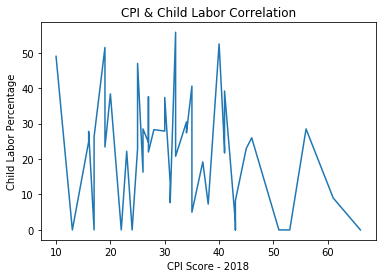

In [81]:
# Let's plot CPI by Child Labor % for Africa
plt.plot(africa_cpi_cl.columns['CPI Score 2018'],
         africa_cpi_cl.columns['Total'])
plt.xlabel('CPI Score - 2018')
plt.ylabel('Child Labor Percentage')
plt.title('CPI & Child Labor Correlation')
plt.show()

# Alexander Lue changed to match proper title name ^^

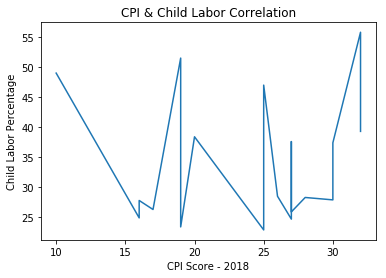

In [82]:
# Let's plot a similar CPI by Child Labor % plot
# but this time for all the African countries above the mean

plt.plot(highest_cpi_cl.columns['CPI Score 2018'],
         highest_cpi_cl.columns['Total'])
plt.xlabel('CPI Score - 2018')
plt.ylabel('Child Labor Percentage')
plt.title('CPI & Child Labor Correlation')
plt.show()

# Alexander Lue changed to match proper title name ^^

# 7. chat_bokeh.py

In [84]:
# We will import the bokeh package so we can work with 
# bokeh charting plots
from bokeh.plotting import figure, show, output_file

In [ ]:
# we are creating an output html file that shows a scatter plot of the chart that uses cpi and Total cl %
def scatter_point(chart, x, y, marker_type):
    chart.scatter(x, y, marker=marker_type, line_color="#6666ee",
                  fill_color="#ee6666", fill_alpha=0.7, size=10)

chart = figure(title="Perceived Corruption and Child Labor in Africa")
output_file("scatter_plot_2018.html")

for row in africa_cpi_cl.rows:
    scatter_point(chart, float(row['CPI Score 2018']),
                  float(row['Total']), 'circle')

show(chart)

# Alexander Lue changed to match proper title name ^^